# [《100天成为风控专家》](https://app7hmmvkwr2019.h5.xiaoeknow.com/p/course/ecourse/course_2ZAoFMNREbOv3DutKsoIi9Vlfky) 规则篇-规则生成(2)-交叉表Python代码实操

In [123]:
import pandas as pd
import numpy as np
import scorecardpy as sc
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
## 设置属性防止中文乱码
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

# 一、数据探索

In [124]:
df = pd.read_csv('lending_club_loan_two.csv')
df.shape

(396030, 27)

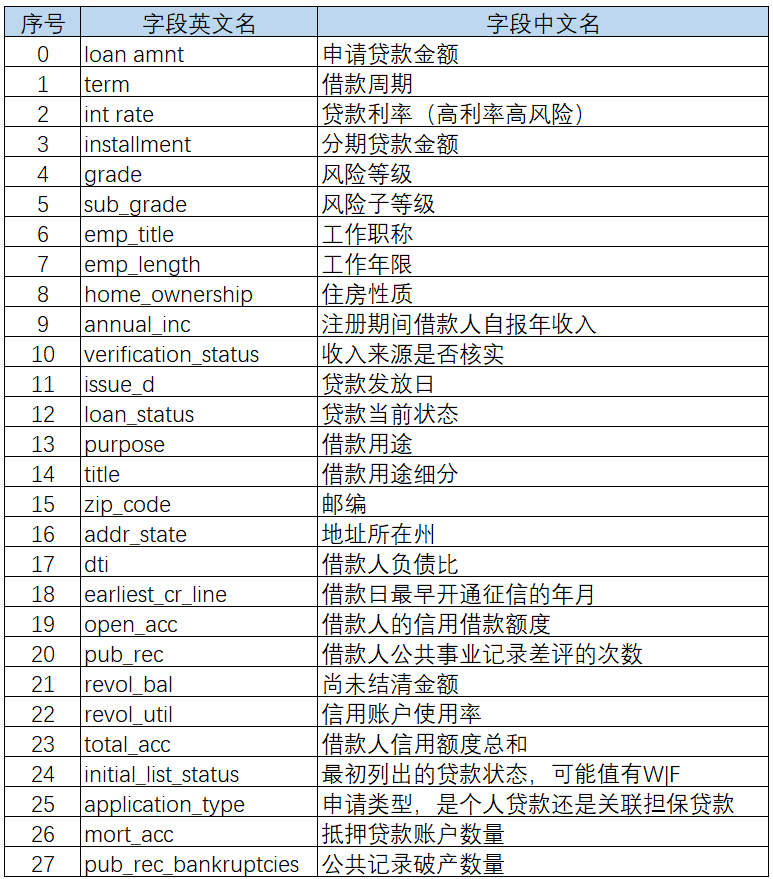

In [125]:
df.describe()

loan_amnt       int_rate    installment    annual_inc   
count  396030.000000  396030.000000  396030.000000  3.960300e+05  \
mean    14113.888089      13.639400     431.849698  7.420318e+04   
std      8357.441341       4.472157     250.727790  6.163762e+04   
min       500.000000       5.320000      16.080000  0.000000e+00   
25%      8000.000000      10.490000     250.330000  4.500000e+04   
50%     12000.000000      13.330000     375.430000  6.400000e+04   
75%     20000.000000      16.490000     567.300000  9.000000e+04   
max     40000.000000      30.990000    1533.810000  8.706582e+06   

                 dti       open_acc        pub_rec     revol_bal   
count  396030.000000  396030.000000  396030.000000  3.960300e+05  \
mean       17.379514      11.311153       0.178191  1.584454e+04   
std        18.019092       5.137649       0.530671  2.059184e+04   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        11.280000       8.000000       0.000000  6.025000e+03   
50%        16.910000      10.000000       0.000000  1.118100e+04   
75%        22.980000      14.000000       0.000000  1.962000e+04   
max      9999.000000      90.000000      86.000000  1.743266e+06   

          revol_util      total_acc       mort_acc  pub_rec_bankruptcies  
count  395754.000000  396030.000000  358235.000000         395495.000000  
mean       53.791749      25.414744       1.813991              0.121648  
std        24.452193      11.886991       2.147930              0.356174  
min         0.000000       2.000000       0.000000              0.000000  
25%        35.800000      17.000000       0.000000              0.000000  
50%        54.800000      24.000000       1.000000              0.000000  
75%        72.900000      32.000000       3.000000              0.000000  
max       892.300000     151.000000      34.000000              8.000000

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [127]:
def simple_statics(df):
    # 读入数据
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), 
                      (df[col].isnull()).sum() * 100 / df.shape[0],
                      df[col].value_counts(normalize=True, dropna=False).values[0] * 100, 
                      df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage_of_null',
                                            'Percentage_of_mode', 'Type'])
    stats_df.sort_values('Unique_values', ascending=False, inplace=True)
    return stats_df

In [128]:
sts_df = simple_statics(df)
sts_df.sort_values(by=['Percentage_of_null'],ascending=False)

Feature  Unique_values  Percentage_of_null   
24              mort_acc             33            9.543469  \
6              emp_title         173105            5.789208   
7             emp_length             11            4.621115   
14                 title          48816            0.443401   
25  pub_rec_bankruptcies              9            0.135091   
20            revol_util           1226            0.069692   
26               address         393700            0.000000   
12           loan_status              2            0.000000   
1                   term              2            0.000000   
10   verification_status              3            0.000000   
23      application_type              3            0.000000   
8         home_ownership              6            0.000000   
4                  grade              7            0.000000   
13               purpose             14            0.000000   
18               pub_rec             20            0.000000   
17              open_acc             61            0.000000   
5              sub_grade             35            0.000000   
11               issue_d            115            0.000000   
21             total_acc            118            0.000000   
2               int_rate            566            0.000000   
16      earliest_cr_line            684            0.000000   
0              loan_amnt           1397            0.000000   
15                   dti           4262            0.000000   
9             annual_inc          27197            0.000000   
19             revol_bal          55622            0.000000   
3            installment          55706            0.000000   
22   initial_list_status              2            0.000000   

    Percentage_of_mode     Type  
24           35.294548  float64  
6             5.789208   object  
7            31.826124   object  
14           38.500114   object  
25           88.473095  float64  
20            0.558796  float64  
26            0.002020   object  
12           80.387092   object  
1            76.258112   object  
10           35.240512   object  
23           99.820468   object  
8            50.084085   object  
4            29.295255   object  
13           59.214453   object  
18           85.415751  float64  
17            9.286923  float64  
5             6.730551   object  
11            3.748706   object  
21            3.605787  float64  
2             3.133853  float64  
16            0.761811   object  
0             6.986339  float64  
15            0.079034  float64  
9             3.866626  float64  
19            0.537333  float64  
3             0.244426  float64  
22           60.113123   object

## 1. 目标变量

<Axes: xlabel='loan_status'>

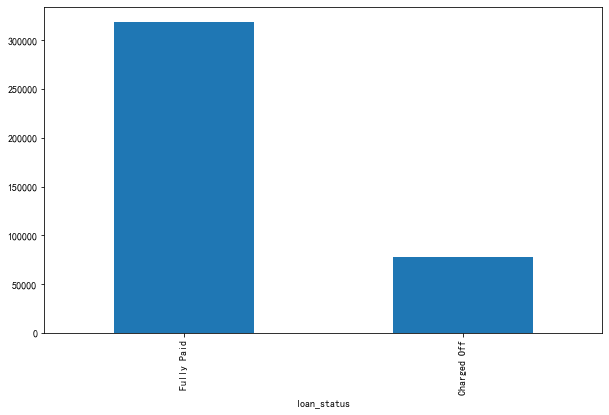

In [48]:
# 目标变量
yflag = 'loan_status'
plt.figure(figsize=(10,6))
df['loan_status'].value_counts(dropna=False).plot.bar()

In [129]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
df['loan_status'].value_counts(dropna=False)

loan_status
0    318357
1     77673
Name: count, dtype: int64

## 2. 特征变量
### 2.1. 变量分类

In [130]:
col = df.columns.difference([yflag,'issue_d','address','emp_title','earliest_cr_line','title'])
# 筛选float和int的数值类型变量
num_list = df[col].select_dtypes(include=['float','int64']).columns.tolist()
# 筛选ojbect字符型的数值类型变量
obj_list = df[col].select_dtypes(include=['object']).columns.tolist()
print('数值类型变量共',len(num_list))
print('object类型变量共',len(obj_list))

数值类型变量共 12
object类型变量共 9


### 2.2. 离散性变量对目标变量坏账率的可视化分析

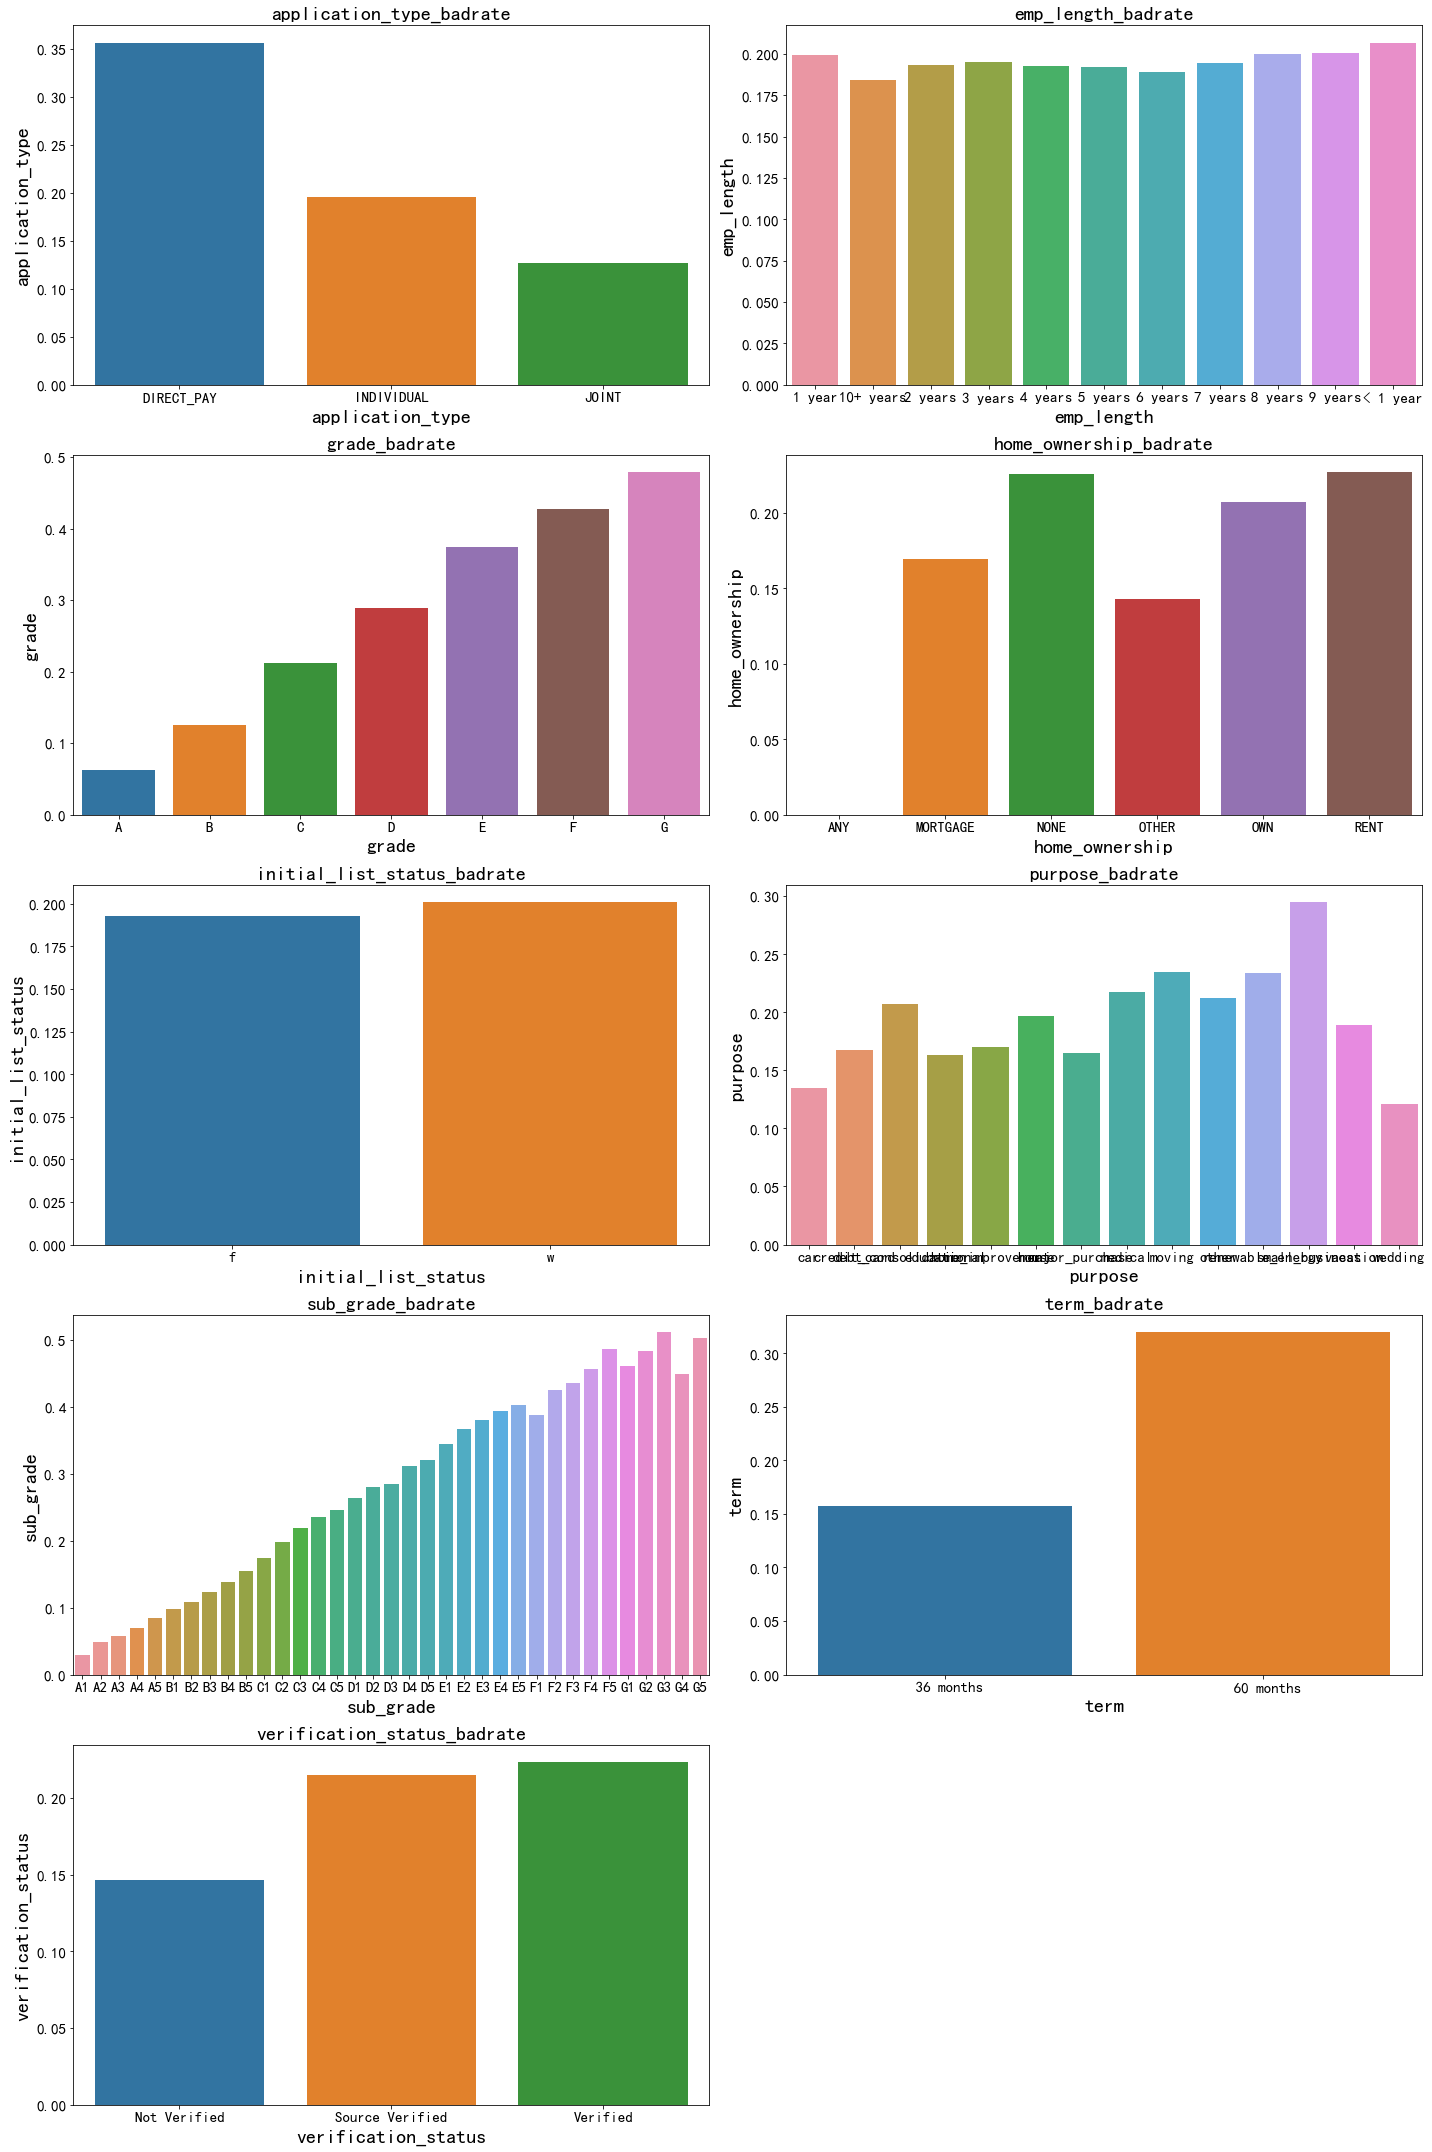

In [131]:
plt.figure(figsize=(20,30))
for i,c in enumerate(obj_list):
    plt.subplot(5, 2, i+1)
    tp = df.groupby([c],as_index=False)[yflag].agg(['mean'])
    sns.barplot(x=c,y='mean',data=tp)
    plt.xticks(size = 15) # 刻度
    plt.yticks(size = 15)
    plt.xlabel(c, fontdict={'size':20}, labelpad=5) #labelpad为标题距离刻度线范围
    plt.ylabel(c, fontdict={'size':20}, labelpad=5)
    plt.title(c+'_badrate', size=20)
    plt.tight_layout()

### 2.3. 连续型变量IV计算

In [132]:
def cal_iv(df0, var_iv, y_flag, breaks_list, stop_limit0):
    """
    分箱并计算IV值
    :param df0: DF格式的数据
    :param var_iv: 需要计算iv的列的列表
    :param y_flag: y标签
    :return iv_df: variable和iv值
    :return bins_base: 字典，分箱值
    """
    iv_list = []
    bins_base = sc.woebin(df0[var_iv + [y_flag]], y=y_flag, breaks_list=breaks_list, method='tree', stop_limit=stop_limit0)
    # 分箱可视化图
    bins_show = sc.woebin_plot(bins_base)
    for col, iv_df_i in bins_base.items():
        iv_df_i['bad_distr'] = iv_df_i['bad']/iv_df_i['bad'].sum() #边际坏占比
        iv_df_i['good_distr'] = iv_df_i['good']/iv_df_i['good'].sum() #边际好占比
        iv_df_i = iv_df_i.rename(columns={'variable':'变量名','bin':'分箱','count':'分箱客户数','count_distr':'分箱客户数占比',
                                         'good':'好客户数','bad':'坏客户数','badprob':'区间坏账率','bad_distr':'边际坏客户占比',
                                         'good_distr':'边际好客户占比'})
        iv_df_i = iv_df_i[['变量名','分箱','分箱客户数','好客户数','坏客户数','分箱客户数占比','边际好客户占比','边际坏客户占比',
                           '区间坏账率','woe','bin_iv','total_iv']]
        bins_base[col] = iv_df_i
        iv_list.append((col,iv_df_i['total_iv'][0])) 
    iv_df = pd.DataFrame.from_records(iv_list,columns=['variable','iv_train'])
    iv_df = iv_df.sort_values(by=['iv_train'], ascending=False)
    return iv_df, bins_base

该函数返回两个对象：
- `iv_df`是所有变量对应IV值的dataframe；
- `bins_base`是所有变量的分箱结果；

[INFO] creating woe binning ...
Binning on 396030 rows and 13 columns in 00:00:42


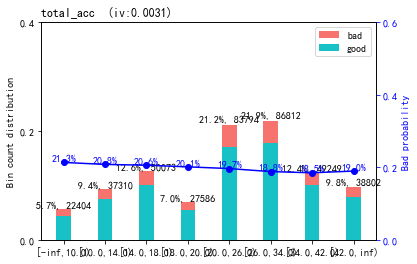

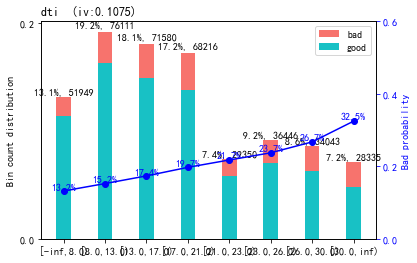

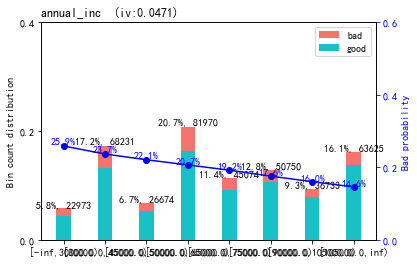

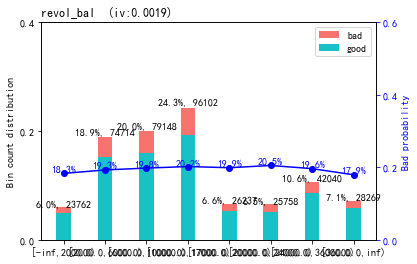

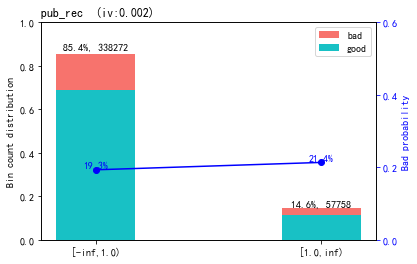

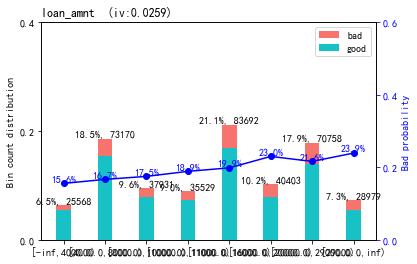

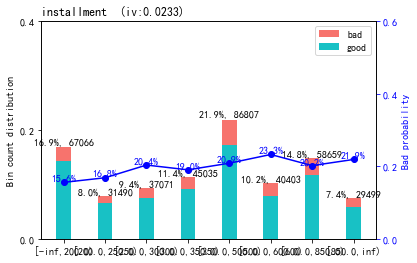

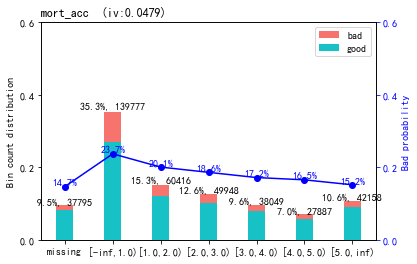

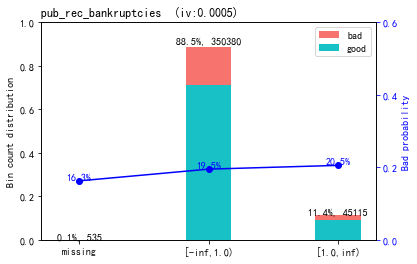

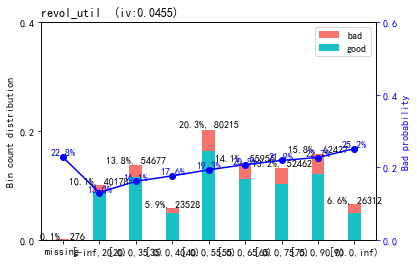

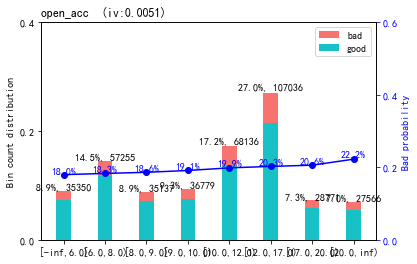

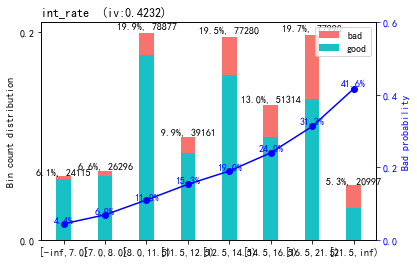

In [133]:
# 计算iv
iv_table, bins_df = cal_iv(df, num_list, y_flag='loan_status', breaks_list={}, stop_limit0=0)

IV指标的一般评判标准：
- `iv < 0.1`: 较弱
- `0.1 <= iv < 0.3`: 强
- `iv > 0.3`: 非常强

In [134]:
iv_table

variable  iv_train
11              int_rate  0.423240
1                    dti  0.107539
7               mort_acc  0.047920
2             annual_inc  0.047112
9             revol_util  0.045488
5              loan_amnt  0.025882
6            installment  0.023303
10              open_acc  0.005051
0              total_acc  0.003104
4                pub_rec  0.002029
3              revol_bal  0.001931
8   pub_rec_bankruptcies  0.000496

- 筛选IV大于0.1的变量

In [135]:
iv_table[iv_table['iv_train']>0.1]

variable  iv_train
11  int_rate  0.423240
1        dti  0.107539

- 查看变量分箱

In [138]:
bins_df['dti']

变量名           分箱  分箱客户数   好客户数   坏客户数   分箱客户数占比   边际好客户占比   边际坏客户占比   
0  dti   [-inf,8.0)  51949  45089   6860  0.131174  0.141630  0.088319  \
1  dti   [8.0,13.0)  76111  64507  11604  0.192185  0.202625  0.149396   
2  dti  [13.0,17.0)  71580  59154  12426  0.180744  0.185810  0.159978   
3  dti  [17.0,21.0)  68216  54762  13454  0.172250  0.172014  0.173213   
4  dti  [21.0,23.0)  29350  22967   6383  0.074111  0.072142  0.082178   
5  dti  [23.0,26.0)  36446  27797   8649  0.092028  0.087314  0.111351   
6  dti  [26.0,30.0)  34043  24941   9102  0.085961  0.078343  0.117184   
7  dti   [30.0,inf)  28335  19140   9195  0.071548  0.060121  0.118381   

      区间坏账率       woe    bin_iv  total_iv  
0  0.132053 -0.472265  0.025177  0.107539  
1  0.152462 -0.304758  0.016222  0.107539  
2  0.173596 -0.149687  0.003867  0.107539  
3  0.197226  0.006946  0.000008  0.107539  
4  0.217479  0.130245  0.001307  0.107539  
5  0.237310  0.243181  0.005845  0.107539  
6  0.267368  0.402647  0.015639  0.107539  
7  0.324510  0.677545  0.039474  0.107539

In [137]:
# 整体样本坏客户浓度
df[yflag].mean()

0.1961290811302174

以上分箱我们观察到：
- badprob(区间坏账率)有明显排序性，`int_rate(利率)`和`dti(负债比)`随着数值增大区间坏账率单调递增；
- 符合业务可解释性，`int_rate(利率)`和`dti(负债比)`值越大，客户风险越高；

# 二、交叉表规则

## 1. 连续型变量分箱

In [139]:
df['int_rate_bins'] = pd.cut(df['int_rate'],bins=[-1,7,8,11.5,12.5,14.5,16.5,21.5,100])
df['dti_bins'] = pd.cut(df['dti'],bins=[-1,8,13,17,21,23,26,30,1000])

## 2. 透视表

### 2.1. 格子客户计数

In [140]:
loan_cnt = pd.crosstab(df['int_rate_bins'], df['grade'])
loan_cnt

grade              A      B      C      D      E      F     G
int_rate_bins                                                
(-1.0, 7.0]    24047     24     16     12     13      2     1
(7.0, 8.0]     26453      0      0      0      0      0     0
(8.0, 11.5]    13687  64881    152      0      0      0     0
(11.5, 12.5]       0  31149   7985     27      0      0     0
(12.5, 14.5]       0  19964  56866    431     25      0     0
(14.5, 16.5]       0      0  35808  14999    483     18     0
(16.5, 21.5]       0      0   5160  48055  23864    770   141
(21.5, 100.0]      0      0      0      0   7103  10982  2912

### 2.2. 格子坏客户数求和

In [141]:
loan_bad_sum = df.pivot_table(index='int_rate_bins',columns='grade',values=yflag, aggfunc='sum')
loan_bad_sum

grade             A     B      C      D     E     F     G
int_rate_bins                                            
(-1.0, 7.0]    1065     0      0      1     1     0     0
(7.0, 8.0]     1819     0      0      0     0     0     0
(8.0, 11.5]    1152  7487     30      0     0     0     0
(11.5, 12.5]      0  4397   1593     10     0     0     0
(12.5, 14.5]      0  2703  11879     83     7     0     0
(14.5, 16.5]      0     0   7792   4411   109     7     0
(16.5, 21.5]      0     0   1155  13833  9123   231    44
(21.5, 100.0]     0     0      0      0  2525  4799  1417

### 2.3. 区间坏账率

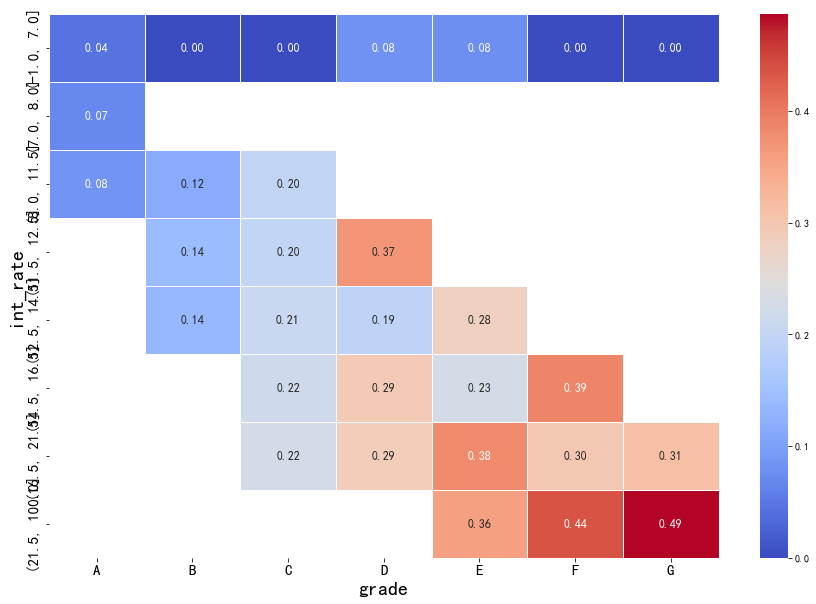

In [142]:
# 区间坏账率
cross_badrate = loan_bad_sum/loan_cnt
# 可视化
plt.figure(figsize=(15,10))
sns.heatmap(cross_badrate, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, annot_kws={'size':12}) 
plt.xticks(size = 15) # 刻度
plt.yticks(size = 15)
plt.xlabel('grade', fontdict={'size':20}, labelpad=5) #labelpad为标题距离刻度线范围
plt.ylabel('int_rate', fontdict={'size':20}, labelpad=5)
plt.show()

### 2.4. 客户数占比

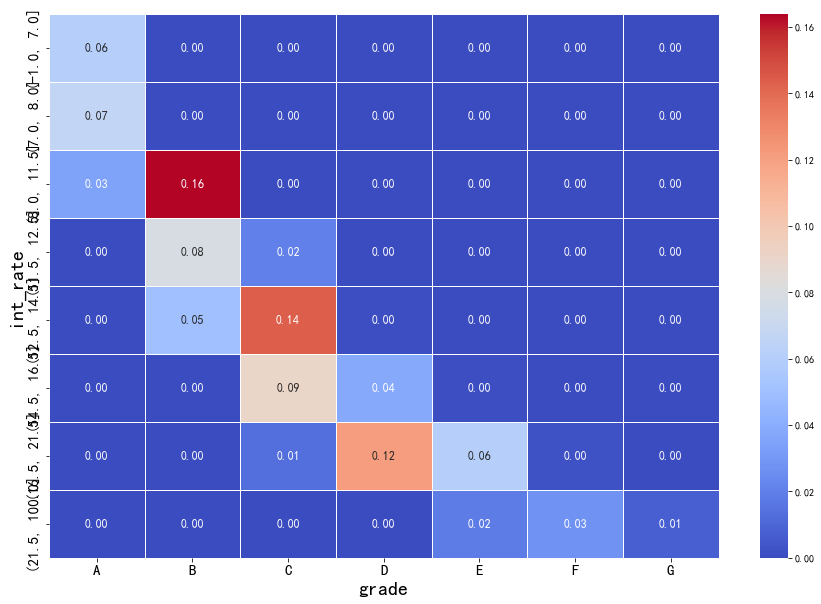

In [143]:
loan_pct = loan_cnt/df.shape[0]
# 可视化
plt.figure(figsize=(15,10))
sns.heatmap(loan_pct, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, annot_kws={'size':12}) 
plt.xticks(size = 15) # 刻度
plt.yticks(size = 15)
plt.xlabel('grade', fontdict={'size':20}, labelpad=5) #labelpad为标题距离刻度线范围
plt.ylabel('int_rate', fontdict={'size':20}, labelpad=5)
plt.show()

## 3. 制定规则

**规则：(int_rate>21.5)&(grade==G)**

评估指标：
- badrate=49%
- lift=49%/19.61%=2.5
- hitrate=1%

**规则：(int_rate>21.5)&(grade==G|F)**

评估指标：
- badrate=44.74%
- lift=44.74%/19.61%=2.3
- hitrate=4%

# 番外

如果对pandas不熟悉想要进阶的朋友可以了解下东哥的这个原创笔记，已经完全体，后续随着版本迭代会持续更新。

[《pandas进阶宝典》](https://app7hmmvkwr2019.h5.xiaoeknow.com/p/course/ecourse/course_2YD5u0x8FzrAIyM8soEuxnTkP9r)永久访问权限，500页图文笔记，近30万字，配套完整代码支持下载。

5大核心图文，具体包括：
- 《pandas快速入门》
- 《pandas进阶宝典》
- 《pandas实战项目》
- 《pandas进阶题库》
- 《Numpy速查手册》
- 《正则表达式手册》

感兴趣可以扫码了解，或者加我微信可以有折扣，加V：`Petery_1966`

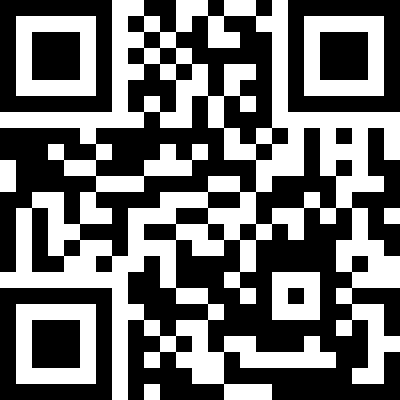